Nomes dos integrantes: 

Antônio Augusto Carnevalli NUSP: 13682909

Gustavo Beraldo de Andrade Melo NUSP: 11258183

# PSI3471 - Exercicio Computacional 2


In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

* Declaração de Variaveis de Entrada
* Criação de Função Limitadora para Saída do Perceptron

In [84]:
# As entradas de cada linha correspondem aos pixeis de uma imagem, distribuídos
# em uma matriz 20x20. A última coluna do Df diz se é um círculo (-1) ou um quadrado (1)
data_df = pd.read_csv("circles_and_squares.csv")
data = data_df.to_numpy()

# Separando os dados em dados de treino e dados de teste
Xd_treino = data[:800, :]
Xd_test = data[800:, :]

xtreino = []
dtreino = []
xtreino = Xd_treino[:, :-1]
xtreino.reshape(-1, 400)
dtreino = Xd_treino[:, -1]
dtreino = dtreino.reshape(-1, 1)
print(xtreino.shape)
print(dtreino.shape)


xteste = []
dteste = []
xteste = Xd_test[:, :-1]
xteste.reshape(-1, 400)
dteste = Xd_test[:, -1]
dteste = dteste.reshape(-1, 1)
print(xteste.shape)
print(dteste.shape)


# Função que transforma as saídas em sinais de valor -1 ou 1 (como se fosse np.heaviside, mas para devolver -1/1 ao invés de 0/1)
def func_tratamento(x):
  for i in range(len(x)):
    if x[i][0] >= 0:
      x[i][0] = int(1)
    else:
      x[i][0] = int(-1)
  return x


(800, 400)
(800, 1)
(200, 400)
(200, 1)


Definição da função utilizada como Neuronio de Rosenblatt (modo de mini-batch)

In [85]:
# Utilizaremos para o treino uma adaptação do código visto em aula

def Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw):
    """
    W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb)
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    Nb: tamanho do mini-batch
    dw: desvio padrão para inicialização de w
    """
    """
    Novamente, vamos juntar o sinal de entrada e o sinal desejado em um único vetor, 
    uma vez que a cada época vamos embaralhar os dados.
    Ao fazer isso, já inserimos uma coluna de 1's para levar em conta o bias.
    """

    M = x.shape[1]
    Nmb = int(np.floor(Nt / Nb))
    W = dw * np.random.uniform(-0.01, 0.01, (Ne * Nmb + 1, M + 1))    
    Xd = np.hstack((np.ones((Nt, 1)), x, d))

    # No modo mini-batch, o passo de adaptação é dividido por Nb
    eta = eta / Nb
    for k in range(Ne):
        np.random.shuffle(Xd)
        x = Xd[:, 0 : M + 1]
        d = Xd[:, [M + 1]]
        for l in range(Nmb):
            m = k * Nmb + l
            dmb = d[l * Nb : (l + 1) * Nb]
            xmb = x[l * Nb : (l + 1) * Nb, :]
            vmb = xmb @ (W[[m], :].T)
            Svmb = func_tratamento(vmb)
            emb = dmb - Svmb
            Gmb = xmb.T @ emb          
            W[[m + 1], :] = W[[m], :] + eta * Gmb.T
    return W

* Definição dos parametros utilizados
* Uso do perceptron para o modo de treinamento
* Erro para o modo de treinamento



Taxa de erro: 9.125 %


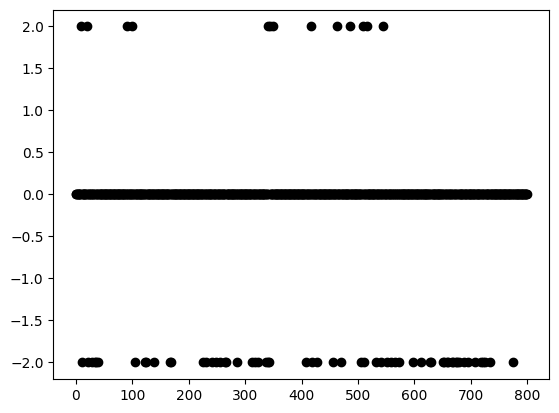

In [89]:
eta = 0.25
Ntreino = Xd_treino.shape[0]
Nb = 25
Ne = 250
dw = 0.02


W = Rosenblatt_minibatch(xtreino, dtreino, eta, Ntreino, Ne, Nb, dw)
it_final = Ne * int(np.floor(Ntreino / Nb))
Wfinal = W[[it_final], :]


# Adicionaremos uma coluna de 1s na entrada para levar em conta o bias
xtreino1 = np.hstack((np.ones((Ntreino, 1)), xtreino))
vtreino = xtreino1 @ Wfinal.T
ytreino = func_tratamento(vtreino)
etreino = dtreino - ytreino

Taxa_de_erro1 = np.sum(abs(etreino)) * 100 / (2*Ntreino)
plt.figure()
plt.plot(etreino, "ok", label="Rosenblatt")
print(f"Taxa de erro: {Taxa_de_erro1} %")


* Uso do perceptron para o modo de teste
* Erro para o modo de teste


Taxa de erro: 32.0 %


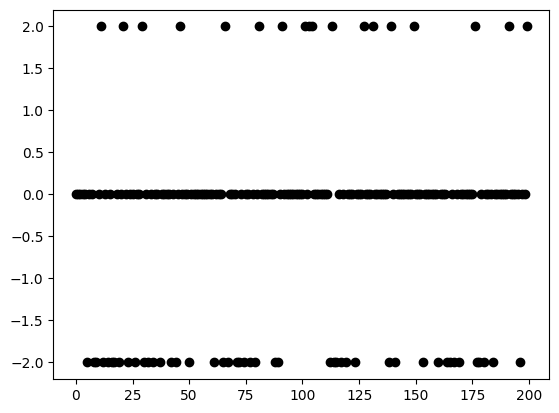

In [90]:
Nteste = Xd_test.shape[0]

xtest = np.hstack((np.ones((Nteste, 1)), xteste))
vtest = xtest @ (Wfinal.T)
ytest = func_tratamento(vtest)
etest = dteste - ytest

plt.figure()
plt.plot(etest, "ok", label="Rosenblatt")
Taxa_de_erro2 = np.sum(abs(etest)) * 100 / (2*Nteste)
print(f"Taxa de erro: {Taxa_de_erro2} %")